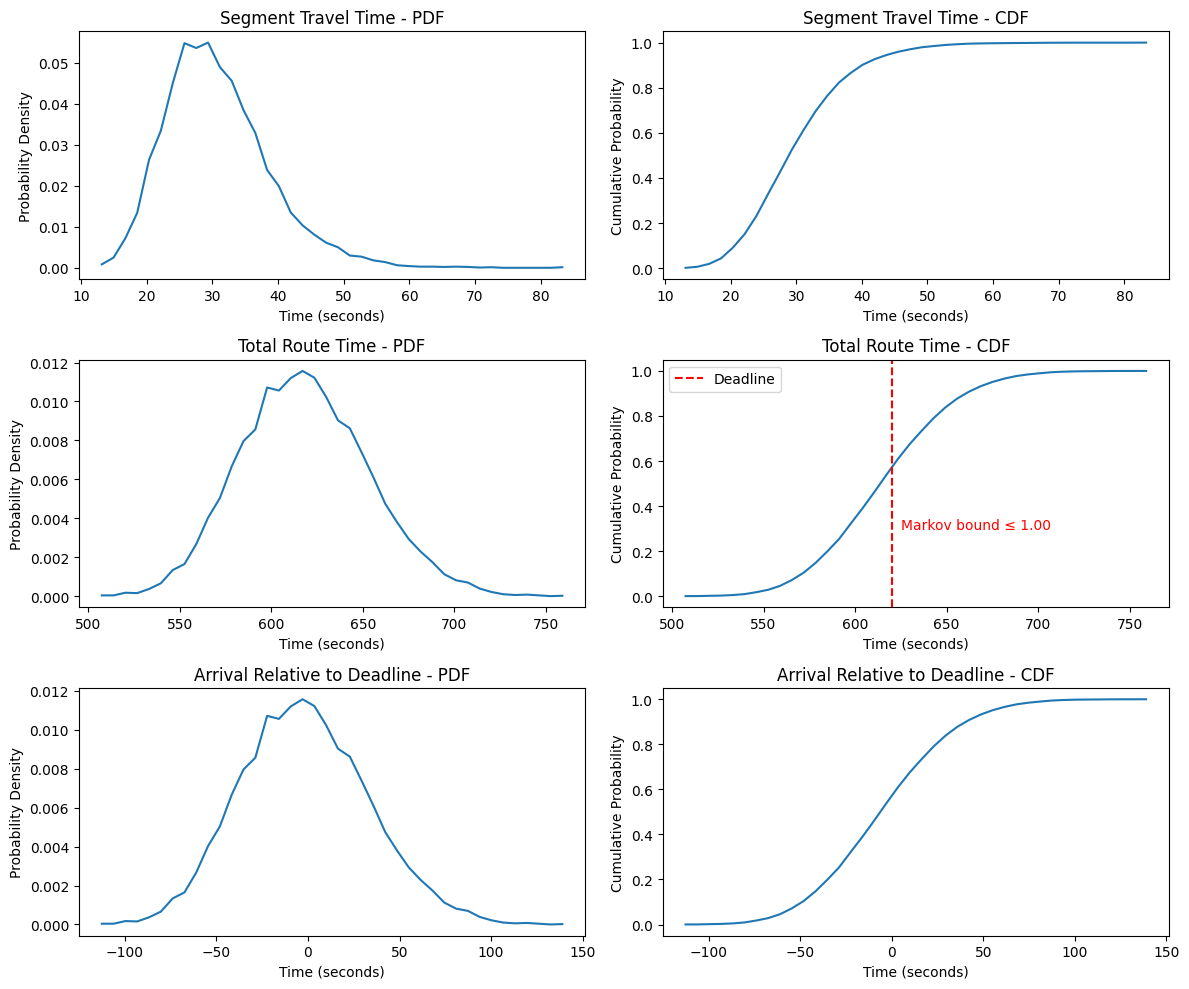

Mean route time: 618.2
Markov bound  P(T ≥ D) ≤ 0.997


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

# -------------------------
# 1. Simulate data
# -------------------------

# Segment travel time (skewed like traffic)
segment_time = np.random.lognormal(mean=3.4, sigma=0.25, size=8000)

# Total route time = sum of segments
n_segments = 20
total_route_time = np.sum(
    np.random.lognormal(3.4, 0.25, (8000, n_segments)), axis=1
)

# Deadline
D = 620

# Arrival relative to deadline
arrival_diff = total_route_time - D


# -------------------------
# 2. Empirical PDF + CDF
# -------------------------

def plot_pdf_cdf(data, ax_pdf, ax_cdf, title_pdf, title_cdf, bins=40):
    counts, edges = np.histogram(data, bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    # PDF
    ax_pdf.plot(centers, counts)
    ax_pdf.set_title(title_pdf)
    ax_pdf.set_xlabel("Time (seconds)")
    ax_pdf.set_ylabel("Probability Density")

    # CDF
    cdf = np.cumsum(counts)
    cdf = cdf / cdf[-1]
    ax_cdf.plot(centers, cdf)
    ax_cdf.set_title(title_cdf)
    ax_cdf.set_xlabel("Time (seconds)")
    ax_cdf.set_ylabel("Cumulative Probability")


# -------------------------
# 3. Markov Inequality
# -------------------------

mean_route = np.mean(total_route_time)
markov_bound = mean_route / D   # P(T ≥ D) ≤ mean/D


# -------------------------
# 4. Plot everything
# -------------------------

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

plot_pdf_cdf(segment_time,
             axs[0,0], axs[0,1],
             "Segment Travel Time - PDF",
             "Segment Travel Time - CDF")

plot_pdf_cdf(total_route_time,
             axs[1,0], axs[1,1],
             "Total Route Time - PDF",
             "Total Route Time - CDF")

plot_pdf_cdf(arrival_diff,
             axs[2,0], axs[2,1],
             "Arrival Relative to Deadline - PDF",
             "Arrival Relative to Deadline - CDF")

# Mark deadline + Markov bound
axs[1,1].axvline(D, color='r', linestyle='--', label="Deadline")
axs[1,1].text(D+5, 0.3, f"Markov bound ≤ {markov_bound:.2f}", color='r')
axs[1,1].legend()

plt.tight_layout()
plt.show()


# -------------------------
# 5. Print bound
# -------------------------

print("Mean route time:", round(mean_route,2))
print("Markov bound  P(T ≥ D) ≤", round(markov_bound,3))